# **Mapping Cancer Rates in Lake County, Illinois: An Exploratory Data Analysis**

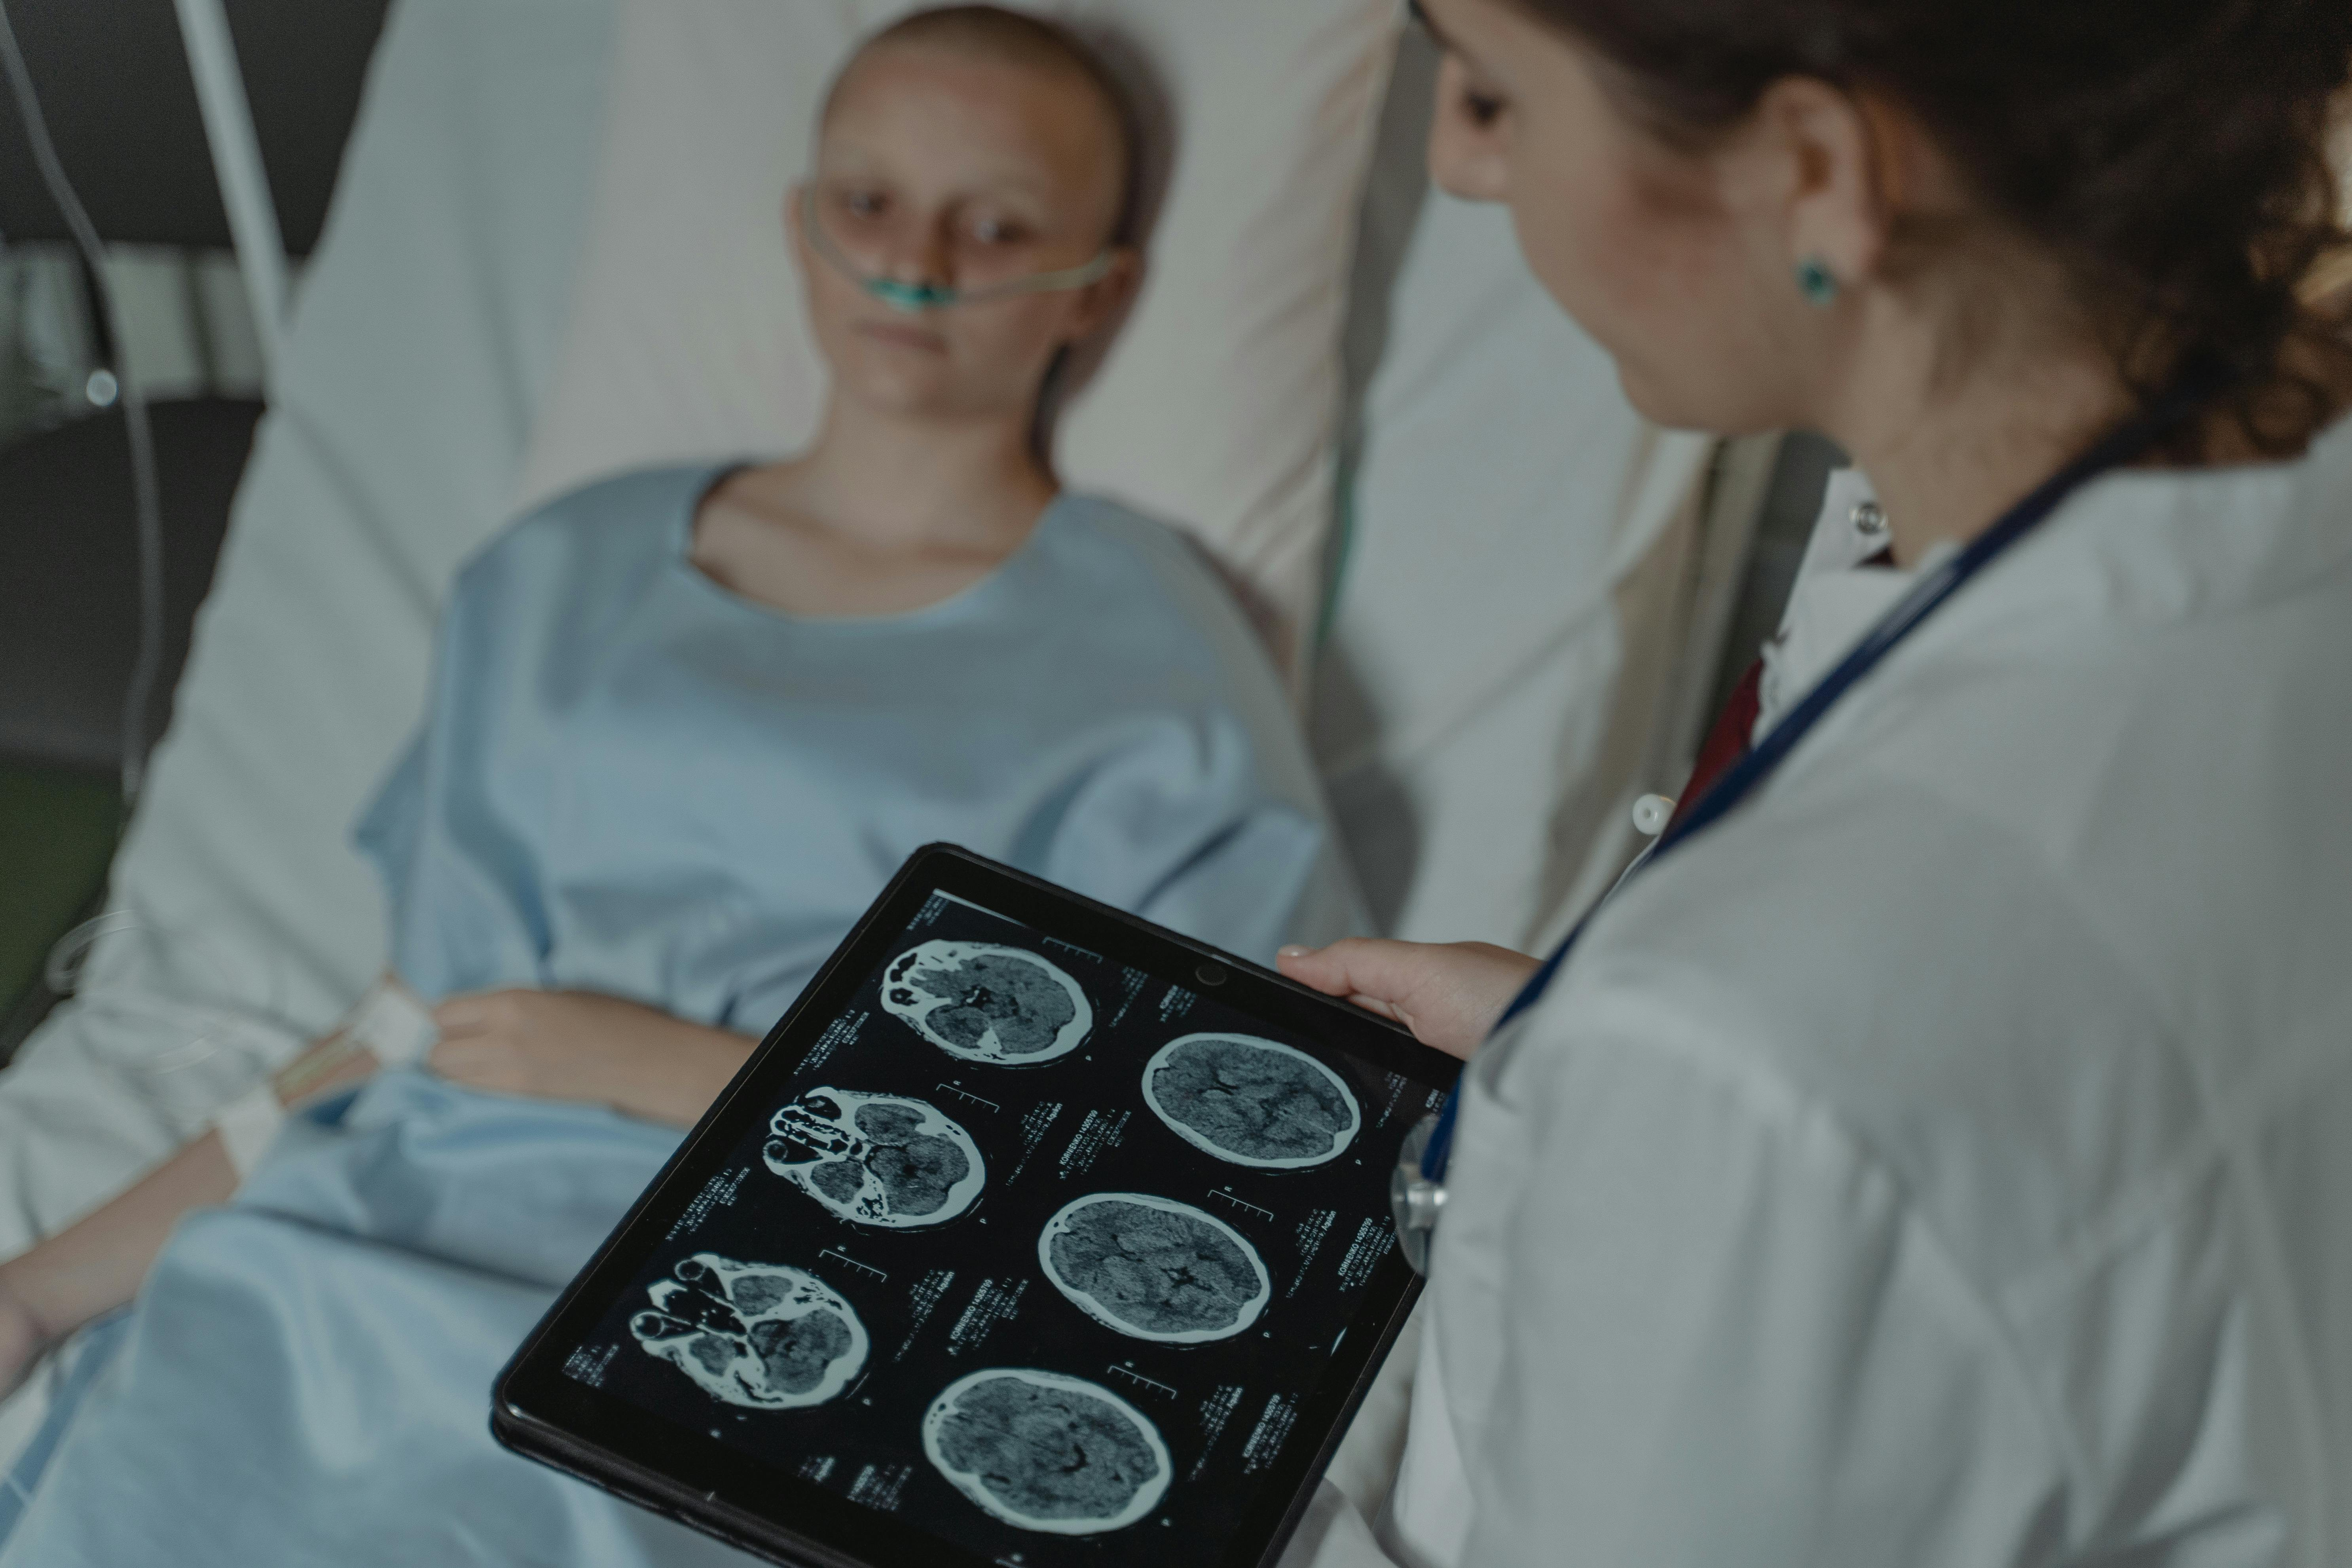
Cancer incidence is a significant public health concern, and understanding its geographic distribution is crucial for targeted interventions. This project uses geospatial techniques to analyze cancer rates in Lake County, Illinois. Using choropleth maps, we highlight areas of concern and potential regional health disparities.

# Cancer Rates

Data Obtained from (https://catalog.data.gov/dataset/cancer-rates-5cf0c)

### Metadata:

Cancer Rates for Lake County Illinois. Explanation of field attributes:

Colorectal Cancer - Cancer that develops in the colon (the longest part of the large intestine) and/or the rectum (the last several inches of the large intestine). This is a rate per 100,000.

Lung Cancer – Cancer that forms in tissues of the lung, usually in the cells lining air passages. This is a rate per 100,000.

Breast Cancer – Cancer that forms in tissues of the breast. This is a rate per 100,000.       

Prostate Cancer – Cancer that forms in tissues of the prostate. This is a rate per 100,000.

Urinary System Cancer – Cancer that forms in the organs of the body that produce and discharge urine. These include the kidneys, ureters, bladder, and urethra. This is a rate per 100,000.

All Cancer – All cancers including, but not limited to: colorectal cancer, lung cancer, breast cancer, prostate cancer, and cancer of the urinary system. This is a rate per 100,000.

In [1]:
# install libraries
# pip install geopandas

In [2]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd

In [3]:
# Load the dataset
url = "https://data-lakecountyil.opendata.arcgis.com/datasets/lakecountyil::cancer-rates.csv?where=1=1&outSR=%7B%22latestWkid%22%3A3435%2C%22wkid%22%3A102671%7D"
data1 = pd.read_csv(url)

data=gpd.read_file('https://data-lakecountyil.opendata.arcgis.com/datasets/lakecountyil::cancer-rates.geojson?where=1=1&outSR=%7B%22latestWkid%22%3A3435%2C%22wkid%22%3A102671%7D')

# Display basic information about the dataset
data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   FID           27 non-null     int32   
 1   ZIP           27 non-null     object  
 2   Colorectal    27 non-null     float64 
 3   Lung_Bronc    27 non-null     float64 
 4   Breast_Can    27 non-null     float64 
 5   Prostate_C    27 non-null     float64 
 6   Urinary_Sy    27 non-null     float64 
 7   All_Cancer    27 non-null     float64 
 8   SHAPE_Length  27 non-null     float64 
 9   SHAPE_Area    27 non-null     float64 
 10  geometry      27 non-null     geometry
dtypes: float64(8), geometry(1), int32(1), object(1)
memory usage: 2.3+ KB


In [4]:
data.head() #basic info

,FID,ZIP,Colorectal,Lung_Bronc,Breast_Can,Prostate_C,Urinary_Sy,All_Cancer,SHAPE_Length,SHAPE_Area,geometry
0,1,60002,218.062127,419.666735,399.094836,259.205925,259.205925,2703.147501,0.730857,0.011686,"MULTIPOLYGON (((-87.95158 42.49462, -87.95238 ..."
1,2,60010,258.915706,335.464697,504.322767,499.819885,227.395533,3248.829251,0.585157,0.008129,"MULTIPOLYGON (((-88.11591 42.24075, -88.11719 ..."
2,3,60015,153.435867,230.153801,478.573777,442.041428,222.847331,2922.587952,0.371889,0.003720,"MULTIPOLYGON (((-87.85212 42.20407, -87.8528 4..."
3,4,60020,292.797189,507.515128,214.717939,302.557095,370.876440,3084.130392,0.299823,0.001693,"MULTIPOLYGON (((-88.16098 42.41559, -88.15756 ..."
4,5,60030,221.535432,284.440555,404.780789,322.730629,210.595411,2581.845035,0.796327,0.008580,"MULTIPOLYGON (((-87.99991 42.3622, -87.99876 4..."


In [5]:
data.drop(columns='FID', inplace=True)

In [6]:
# Check for missing values
print(data.isnull().sum(), "\n\n")

# Check for duplicates
print(data.duplicated().sum())

# Handle missing values and duplicates if needed
# data.drop_duplicates(inplace=True)
# data.dropna(inplace=True)


ZIP             0
Colorectal      0
Lung_Bronc      0
Breast_Can      0
Prostate_C      0
Urinary_Sy      0
All_Cancer      0
SHAPE_Length    0
SHAPE_Area      0
geometry        0
dtype: int64 


0


In [7]:
data.describe() #summary stats

,Colorectal,Lung_Bronc,Breast_Can,Prostate_C,Urinary_Sy,All_Cancer,SHAPE_Length,SHAPE_Area
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
mean,215.662049,305.559073,392.842186,320.079975,222.191454,2628.278959,0.473556,0.004764
std,77.162061,107.413853,122.334193,100.547764,87.796594,694.582068,0.177566,0.002984
min,55.555556,182.810215,203.903701,145.973430,56.610894,1465.294184,0.080798,0.000180
25%,175.618187,226.001013,292.531320,249.675972,175.552775,2211.783855,0.346974,0.002232
50%,214.198286,280.606615,398.749247,303.270042,208.090299,2581.845035,0.520156,0.003980
75%,249.823041,337.896841,482.168766,390.328403,243.300729,3039.894429,0.582996,0.006885
max,457.776172,578.243585,626.430551,499.819885,421.635947,4505.481267,0.796327,0.011686


### Correlation Analysis

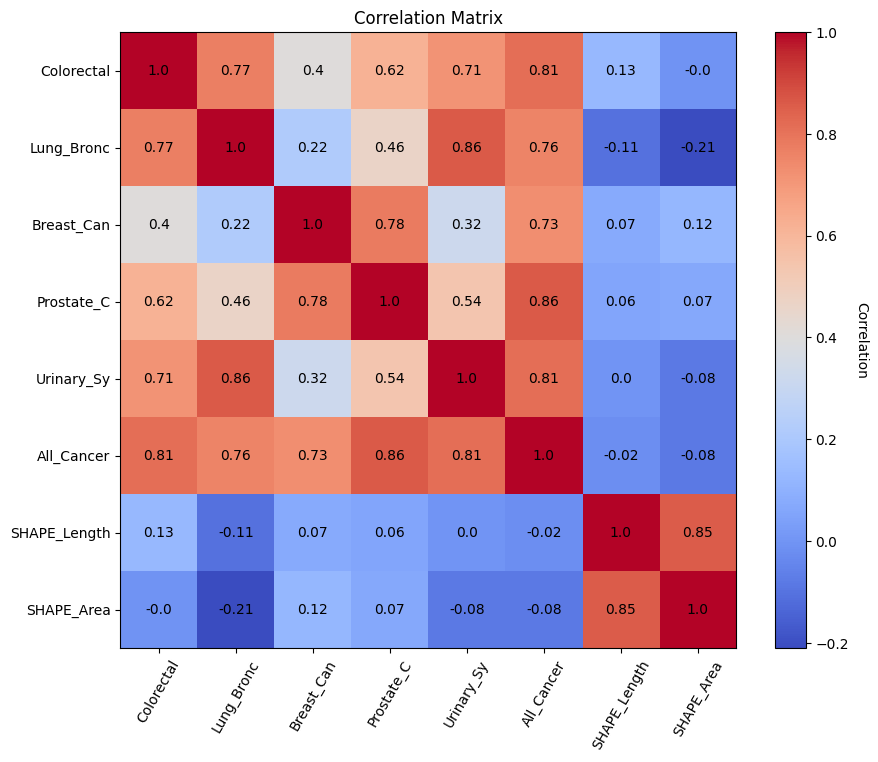

In [8]:
# Calculate the correlation matrix
correlation_matrix = data.corr(numeric_only=True)

# Create a figure and axis for the heatmap
fig, ax = plt.subplots(figsize=(10, 8))

# Create a heatmap using Matplotlib
heatmap = ax.imshow(correlation_matrix, cmap="coolwarm")

# Add annotations (correlation values) to the heatmap
for i in range(len(correlation_matrix)):
    for j in range(len(correlation_matrix)):
        text = ax.text(j, i, round(correlation_matrix.iloc[i, j], 2), ha="center", va="center", color="black")

# Set axis labels and title
ax.set_xticks(np.arange(len(correlation_matrix.columns)))
ax.set_yticks(np.arange(len(correlation_matrix.columns)))
ax.set_xticklabels(correlation_matrix.columns, rotation=60)
ax.set_yticklabels(correlation_matrix.columns)
plt.title("Correlation Matrix")

# Show the color bar
cbar = fig.colorbar(heatmap)
cbar.ax.set_ylabel("Correlation", rotation=-90, va="bottom")

# Display the heatmap
plt.show()


**Figure 1:** The correlation matrix heatmap visually represents the relationships between different cancer types in Lake County, Illinois. In this heatmap, color intensity signifies the strength and direction of correlations, with warm colors (e.g., red) indicating positive correlations and cool colors (e.g., blue) indicating negative correlations. The annotations within each cell display the corresponding correlation coefficients, allowing for an insightful exploration of how cancer rates relate to one another within the dataset.

For instance, a strong positive association between Lung cancer and Urinary System Cancer, as observed in the correlation matrix heatmap, suggests that when the rate of Lung cancer is high in certain areas or regions within Lake County, there is a tendency for the rate of Urinary System Cancer to also be high in those same areas. This observation suggests that there may be common factors or underlying conditions that contribute to both higher rates of Lung cancer and Urinary System Cancer within Lake County.

In [9]:
data.columns

Index(['ZIP', 'Colorectal', 'Lung_Bronc', 'Breast_Can', 'Prostate_C',
       'Urinary_Sy', 'All_Cancer', 'SHAPE_Length', 'SHAPE_Area', 'geometry'],
      dtype='object')

### Data Visualization

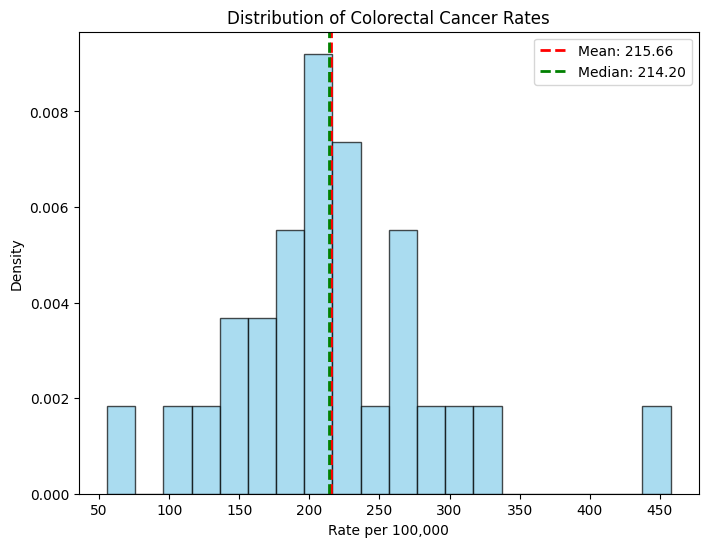

In [10]:
# Create a histogram
plt.figure(figsize=(8, 6))
plt.hist(data["Colorectal"], bins=20, edgecolor='black', density=True, alpha=0.7, color='skyblue')

# Add vertical lines for the mean and median
mean_rate = np.mean(data["Colorectal"])
median_rate = np.median(data["Colorectal"])
plt.axvline(mean_rate, color='red', linestyle='dashed', linewidth=2, label=f"Mean: {mean_rate:.2f}")
plt.axvline(median_rate, color='green', linestyle='dashed', linewidth=2, label=f"Median: {median_rate:.2f}")

plt.title("Distribution of Colorectal Cancer Rates")
plt.xlabel("Rate per 100,000")
plt.ylabel("Density")
plt.legend()

plt.show()

**Figure2:** This histogram displays the distribution of Colorectal Cancer Rates in Lake County, Illinois. The data represents the rate per 100,000 population. The blue bars represent the distribution, with a red dashed line indicating the mean rate and a green dashed line indicating the median rate. The data appears to be approximately normally distributed with an extreme value observed at 450.

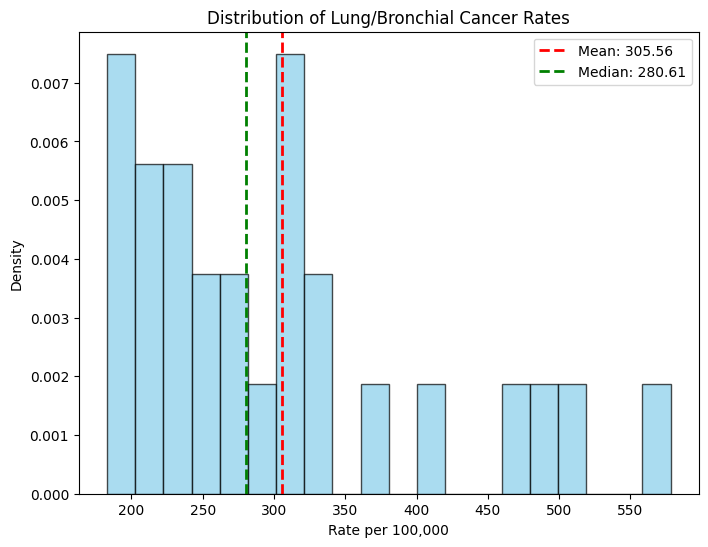

In [11]:
# Create a histogram
plt.figure(figsize=(8, 6))
plt.hist(data["Lung_Bronc"], bins=20, edgecolor='black', density=True, alpha=0.7, color='skyblue')

# Add vertical lines for the mean and median
mean_rate = np.mean(data["Lung_Bronc"])
median_rate = np.median(data["Lung_Bronc"])
plt.axvline(mean_rate, color='red', linestyle='dashed', linewidth=2, label=f"Mean: {mean_rate:.2f}")
plt.axvline(median_rate, color='green', linestyle='dashed', linewidth=2, label=f"Median: {median_rate:.2f}")

plt.title("Distribution of Lung/Bronchial Cancer Rates")
plt.xlabel("Rate per 100,000")
plt.ylabel("Density")
plt.legend()

plt.show()

**Figure3:** This histogram displays the distribution of Lung/Bronchial Cancer Rates in Lake County, Illinois. The data represents the rate per 100,000 population. The blue bars represent the distribution, with a red dashed line indicating the mean rate and a green dashed line indicating the median rate. The data appears to be right-skewed.

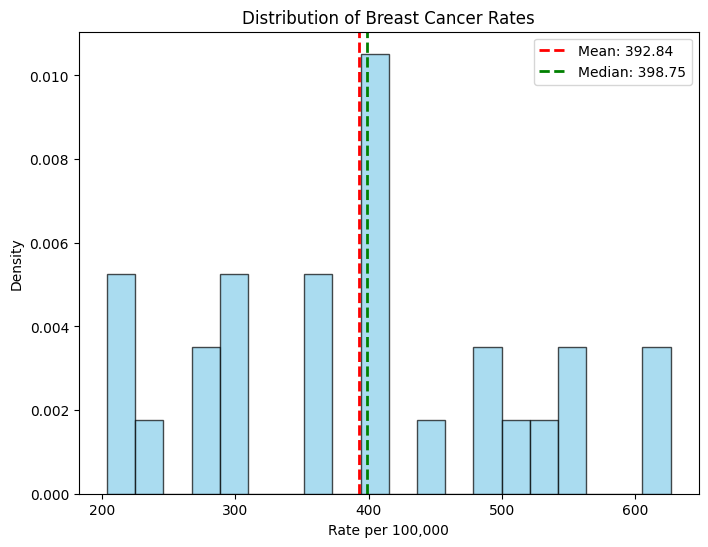

In [12]:
# Create a histogram
plt.figure(figsize=(8, 6))
plt.hist(data["Breast_Can"], bins=20, edgecolor='black', density=True, alpha=0.7, color='skyblue')

# Add vertical lines for the mean and median
mean_rate = np.mean(data["Breast_Can"])
median_rate = np.median(data["Breast_Can"])
plt.axvline(mean_rate, color='red', linestyle='dashed', linewidth=2, label=f"Mean: {mean_rate:.2f}")
plt.axvline(median_rate, color='green', linestyle='dashed', linewidth=2, label=f"Median: {median_rate:.2f}")

plt.title("Distribution of Breast Cancer Rates")
plt.xlabel("Rate per 100,000")
plt.ylabel("Density")
plt.legend()

plt.show()

**Figure4:** This histogram displays the distribution of Breast Cancer Rates in Lake County, Illinois. The data represents the rate per 100,000 population. The blue bars represent the distribution, with a red dashed line indicating the mean rate and a green dashed line indicating the median rate. We can visually observe a lot of spread/variability in the data.

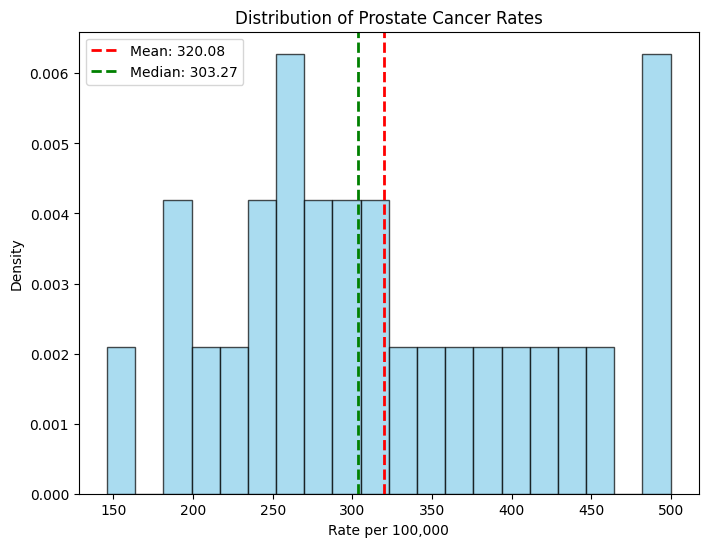

In [13]:
# Create a histogram
plt.figure(figsize=(8, 6))
plt.hist(data["Prostate_C"], bins=20, edgecolor='black', density=True, alpha=0.7, color='skyblue')

# Add vertical lines for the mean and median
mean_rate = np.mean(data["Prostate_C"])
median_rate = np.median(data["Prostate_C"])
plt.axvline(mean_rate, color='red', linestyle='dashed', linewidth=2, label=f"Mean: {mean_rate:.2f}")
plt.axvline(median_rate, color='green', linestyle='dashed', linewidth=2, label=f"Median: {median_rate:.2f}")

plt.title("Distribution of Prostate Cancer Rates")
plt.xlabel("Rate per 100,000")
plt.ylabel("Density")
plt.legend()

plt.show()

**Figure5:** This histogram displays the distribution of Colorectal Cancer Rates in Lake County, Illinois. The data represents the rate per 100,000 population. The blue bars represent the distribution, with a red dashed line indicating the mean rate and a green dashed line indicating the median rate. The relatively small difference between the mean and median indicates a relatively symmetrical distribution.

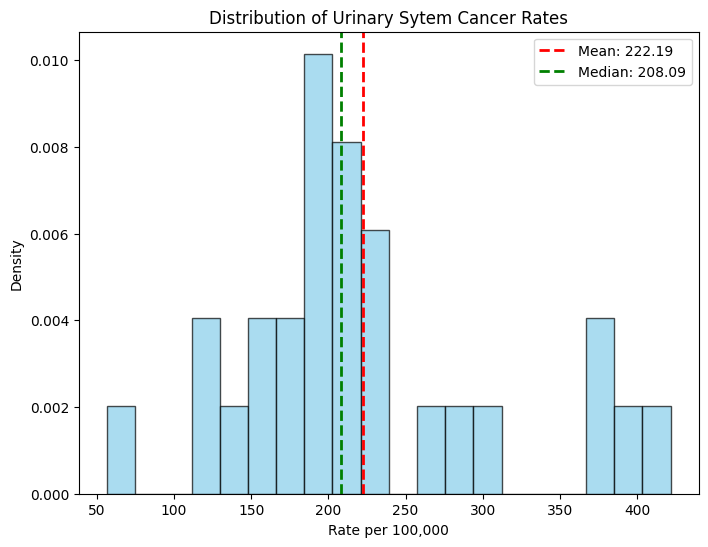

In [14]:
# Create a histogram
plt.figure(figsize=(8, 6))
plt.hist(data["Urinary_Sy"], bins=20, edgecolor='black', density=True, alpha=0.7, color='skyblue')

# Add vertical lines for the mean and median
mean_rate = np.mean(data["Urinary_Sy"])
median_rate = np.median(data["Urinary_Sy"])
plt.axvline(mean_rate, color='red', linestyle='dashed', linewidth=2, label=f"Mean: {mean_rate:.2f}")
plt.axvline(median_rate, color='green', linestyle='dashed', linewidth=2, label=f"Median: {median_rate:.2f}")

plt.title("Distribution of Urinary Sytem Cancer Rates")
plt.xlabel("Rate per 100,000")
plt.ylabel("Density")
plt.legend()

plt.show()

**Figure6:** This histogram displays the distribution of Colorectal Cancer Rates in Lake County, Illinois. The data represents the rate per 100,000 population. The blue bars represent the distribution, with a red dashed line indicating the mean rate and a green dashed line indicating the median rate. The data appears to be relatively symmetric with some degree of variability by visual inspection.

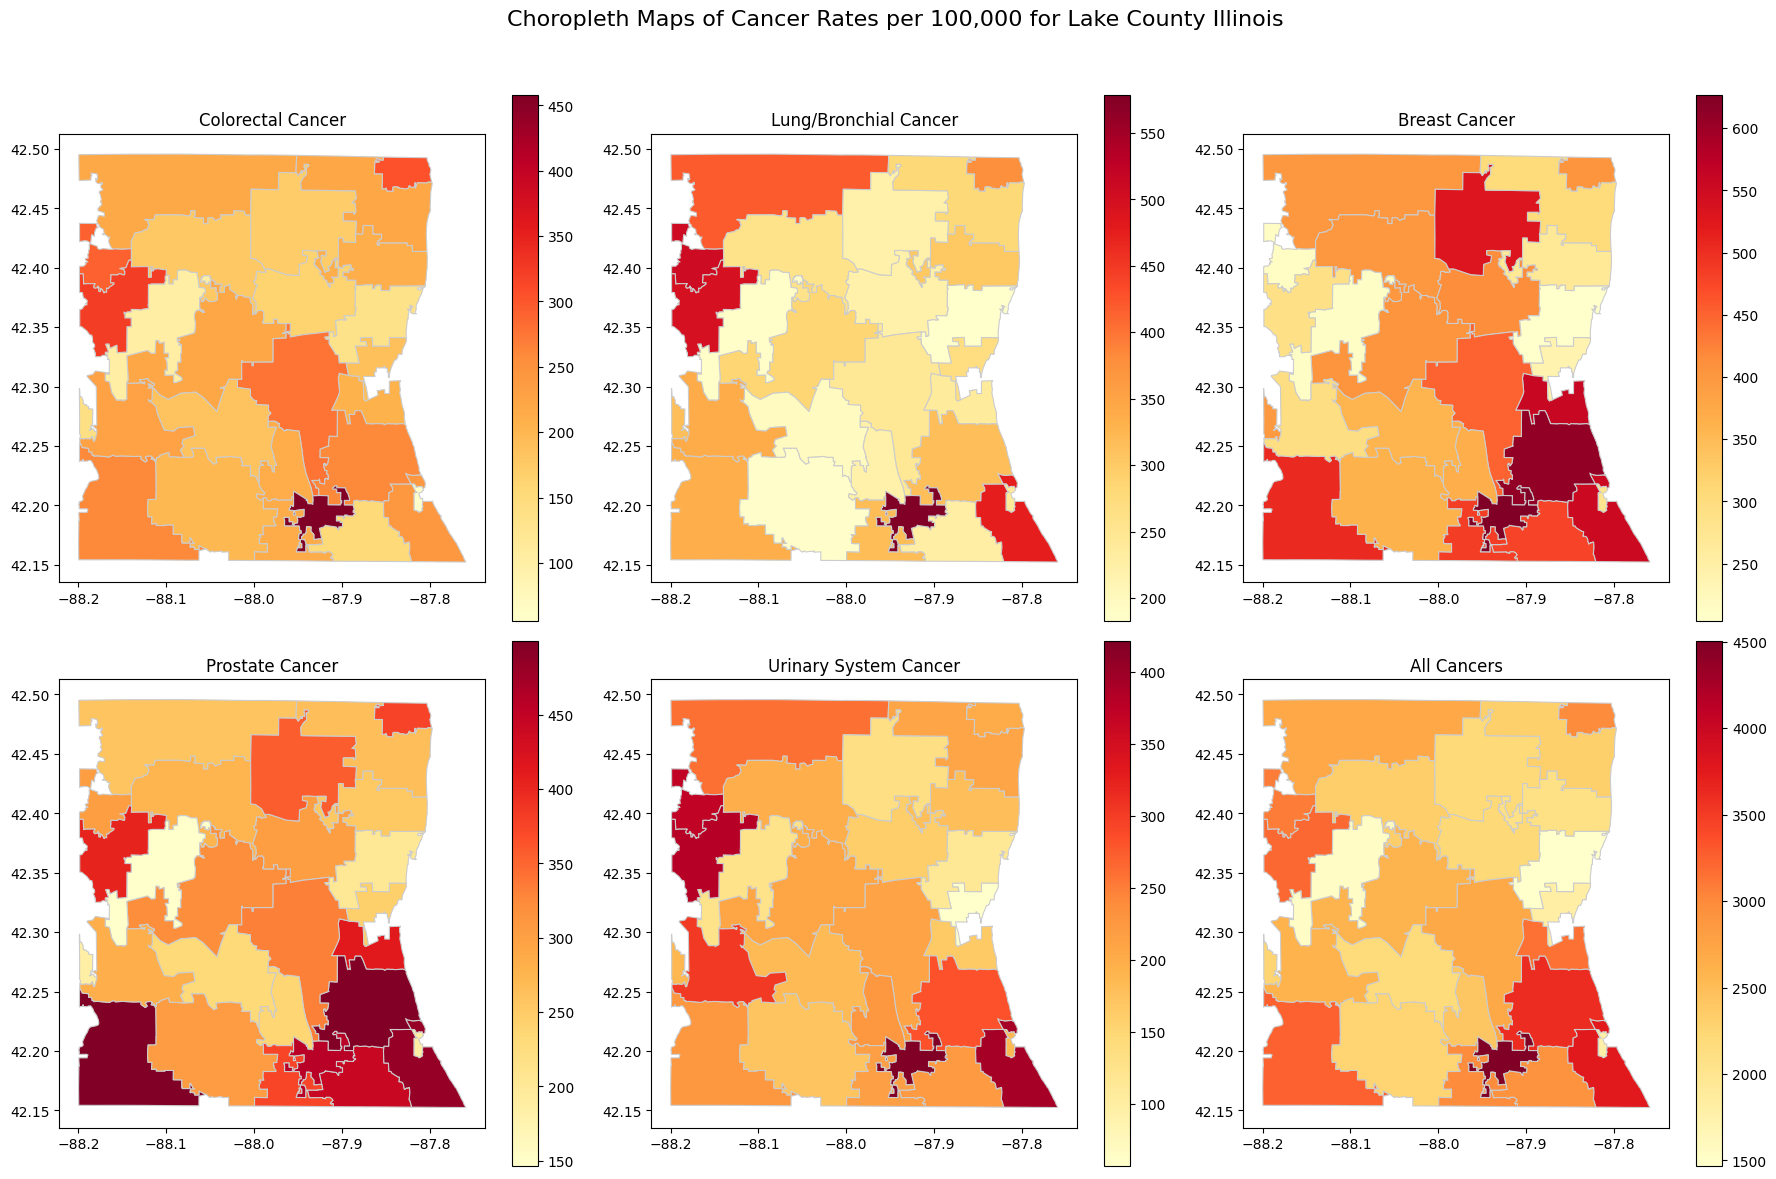

In [15]:
# Specify the list of columns (cancer types) to visualize
columns_to_plot = ['Colorectal', 'Lung_Bronc', 'Breast_Can', 'Prostate_C', 'Urinary_Sy', 'All_Cancer']

# Create subplots for each cancer type
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle("Choropleth Maps of Cancer Rates per 100,000 for Lake County Illinois", fontsize=16)

# Define custom column names for subplots
column_names = [
    'Colorectal Cancer',
    'Lung/Bronchial Cancer',
    'Breast Cancer',
    'Prostate Cancer',
    'Urinary System Cancer',
    'All Cancers'
]

for i, ax in enumerate(axes.flat):
    # Plot a choropleth map for the current cancer type
    data.plot(column=columns_to_plot[i], cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
    ax.set_title(column_names[i])

# Ensure the last subplot is empty if there are fewer than six columns
for i in range(len(columns_to_plot), 6):
    fig.delaxes(axes.flat[i])

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


**Figure7:** This figure displays choropleth maps of cancer rates in Lake County, Illinois, for various cancer types. Each map represents the rate per 100,000 population by ZIP code area. The color intensity indicates the rate, with darker shades representing higher rates.
